# 1. DATA LOADING & PREPROCESSING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Datasets
# Replace these filenames with the actual paths if they are different
try:
    trader_df = pd.read_csv('/content/historical_data.csv')
    sentiment_df = pd.read_csv('/content/fear_greed_index.csv')
except FileNotFoundError:
    print("Error: Please ensure 'historical_data.csv' and 'fear_greed_index.csv' are in the directory.")

In [2]:
trader_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [3]:
sentiment_df

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [4]:
# Parse Dates
# historical_data uses 'Timestamp IST' (DD-MM-YYYY)
trader_df['time'] = pd.to_datetime(trader_df['Timestamp IST'], dayfirst=True, errors='coerce')
# fear_greed_index uses 'date' (YYYY-MM-DD)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [5]:
# Normalize to Date-only for merging
trader_df['date_only'] = trader_df['time'].dt.normalize()
sentiment_df['date_only'] = sentiment_df['date'].dt.normalize()

In [6]:
# Merge Data
merged_df = pd.merge(trader_df, sentiment_df, on='date_only', how='inner')
print(f"Data Merged. Total Records: {len(merged_df)}")

Data Merged. Total Records: 211218


In [7]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,time,date_only,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,...,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,...,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,...,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,...,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,...,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211213,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,...,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,1745559000,60,Greed,2025-04-25
211214,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,...,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,1745559000,60,Greed,2025-04-25
211215,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,...,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,1745559000,60,Greed,2025-04-25
211216,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,...,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,1745559000,60,Greed,2025-04-25


# 2. FEATURE ENGINEERING

In [8]:
# Filter for Closed Trades (Non-zero PnL) for Performance Metrics
closed_trades = merged_df[merged_df['Closed PnL'] != 0].copy()

In [9]:
# Define Entry Directions for Behavior Analysis
entry_directions = ['Open Long', 'Open Short', 'Buy', 'Sell']
entry_trades = merged_df[merged_df['Direction'].isin(entry_directions)].copy()

In [10]:
def map_side(direction):
    if direction in ['Open Long', 'Buy']: return 'Long'
    if direction in ['Open Short', 'Sell']: return 'Short'
    return 'Other'

entry_trades['Position Type'] = entry_trades['Direction'].apply(map_side)

# 3. ANALYSIS & INSIGHTS

In [11]:
# Metric 1: Performance by Sentiment
sentiment_perf = closed_trades.groupby('classification').agg({
    'Closed PnL': ['mean', 'count'],
    'Size USD': 'mean'
})
sentiment_perf.columns = ['Avg PnL', 'Trade Count', 'Avg Size']
sentiment_perf['Win Rate'] = closed_trades.groupby('classification')['Closed PnL'].apply(lambda x: (x > 0).mean())

In [12]:
# Metric 2: Long/Short Ratio
position_counts = entry_trades.groupby(['classification', 'Position Type']).size().unstack(fill_value=0)
position_counts['L/S Ratio'] = position_counts['Long'] / position_counts['Short']

print("\n--- PERFORMANCE SUMMARY ---")
print(sentiment_perf[['Avg PnL', 'Win Rate', 'Avg Size']])

print("\n--- BEHAVIOR SUMMARY (Long/Short Ratio) ---")
print(position_counts['L/S Ratio'])


--- PERFORMANCE SUMMARY ---
                   Avg PnL  Win Rate     Avg Size
classification                                   
Extreme Fear     71.027316  0.762156  5467.570419
Extreme Greed   130.205309  0.891670  2779.563632
Fear            112.625988  0.872886  8041.140445
Greed            85.403927  0.768907  5438.671764
Neutral          71.199993  0.823889  5556.444833

--- BEHAVIOR SUMMARY (Long/Short Ratio) ---
classification
Extreme Fear     1.852941
Extreme Greed    0.771026
Fear             1.475756
Greed            0.749518
Neutral          1.506725
Name: L/S Ratio, dtype: float64


# 4. VISUALIZATION

/tmp/ipython-input-843247780.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_perf.index, y='Avg PnL', data=sentiment_perf, ax=ax1, palette='viridis')


Saved chart: pnl_by_sentiment.png


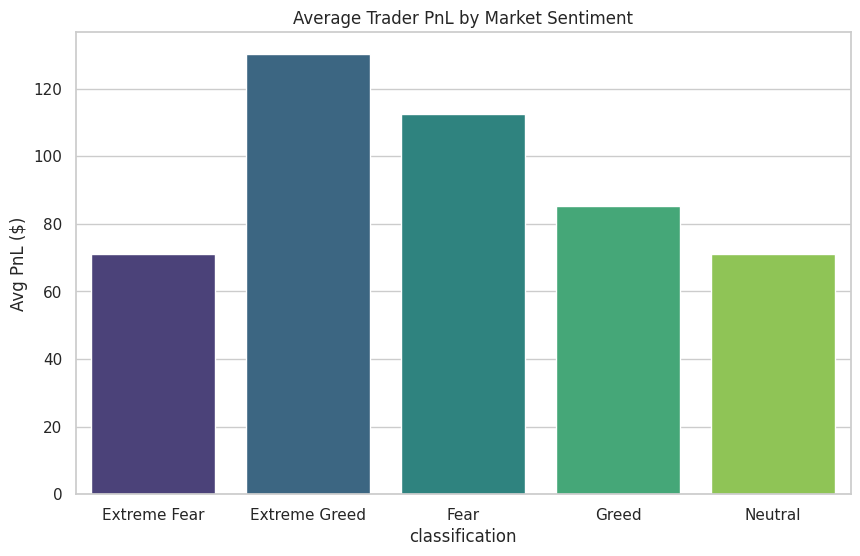

In [13]:
sns.set(style="whitegrid")

# Plot 1: Profitability
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x=sentiment_perf.index, y='Avg PnL', data=sentiment_perf, ax=ax1, palette='viridis')
ax1.set_title('Average Trader PnL by Market Sentiment')
ax1.set_ylabel('Avg PnL ($)')
plt.savefig('pnl_by_sentiment.png')
print("Saved chart: pnl_by_sentiment.png")

/tmp/ipython-input-2039729830.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_counts.index, y='L/S Ratio', data=position_counts, palette='coolwarm')


Saved chart: long_short_ratio.png

Analysis Complete.


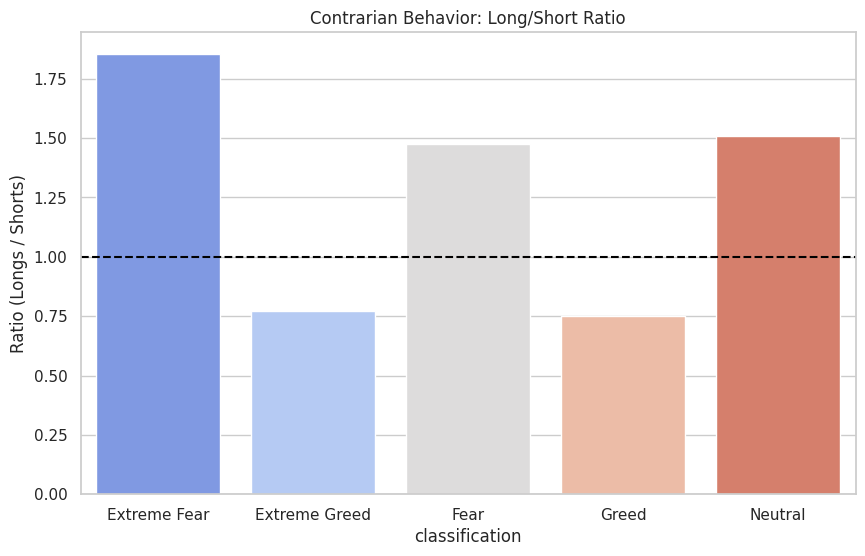

In [14]:
# Plot 2: Long/Short Ratio
fig, ax2 = plt.subplots(figsize=(10, 6))
sns.barplot(x=position_counts.index, y='L/S Ratio', data=position_counts, palette='coolwarm')
ax2.axhline(1, color='black', linestyle='--')
ax2.set_title('Contrarian Behavior: Long/Short Ratio')
ax2.set_ylabel('Ratio (Longs / Shorts)')
plt.savefig('long_short_ratio.png')
print("Saved chart: long_short_ratio.png")

print("\nAnalysis Complete.")

5. ADVANCED METRICS CALCULATION

In [15]:
def calculate_advanced_stats(group):
    wins = group[group['Closed PnL'] > 0]['Closed PnL']
    losses = group[group['Closed PnL'] < 0]['Closed PnL']

    avg_win = wins.mean() if len(wins) > 0 else 0
    avg_loss = abs(losses.mean()) if len(losses) > 0 else 0
    win_rate = len(wins) / len(group)

    return pd.Series({
        'Win Rate': win_rate,
        'Avg Win': avg_win,
        'Avg Loss': avg_loss,
        'Risk/Reward': avg_win / avg_loss if avg_loss > 0 else 0,
        'Avg Size': group['Size USD'].mean()
    })

In [16]:
# Group by Sentiment
deep_dive = closed_trades.groupby('classification').apply(calculate_advanced_stats)

# Coin Performance Analysis (Top 5 Coins)
top_coins = closed_trades.groupby('Coin')['Size USD'].sum().nlargest(5).index
coin_pnl = closed_trades[closed_trades['Coin'].isin(top_coins)].groupby(['Coin', 'classification'])['Closed PnL'].mean().unstack()

print("\n--- RISK/REWARD PROFILE ---")
print(deep_dive[['Risk/Reward', 'Win Rate', 'Avg Size']])

print("\n--- COIN STRATEGY ---")
print(coin_pnl)


--- RISK/REWARD PROFILE ---
                Risk/Reward  Win Rate     Avg Size
classification                                    
Extreme Fear       0.674543  0.762156  5467.570419
Extreme Greed      1.339167  0.891670  2779.563632
Fear               0.969224  0.872886  8041.140445
Greed              0.910942  0.768907  5438.671764
Neutral            0.923695  0.823889  5556.444833

--- COIN STRATEGY ---
classification  Extreme Fear  Extreme Greed        Fear       Greed  \
Coin                                                                  
@107             -153.595224     313.612817   -4.215171  143.775765   
BTC                 4.582969     103.046692  111.158370   35.984790   
ETH               349.898253     -58.928570  472.734297  225.456656   
HYPE              101.256839      66.397737   62.074784   60.038859   
SOL               121.876598      47.802191  359.822555  890.907325   

classification     Neutral  
Coin                        
@107            113.639726  
BTC   

/tmp/ipython-input-5119944.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  deep_dive = closed_trades.groupby('classification').apply(calculate_advanced_stats)


/tmp/ipython-input-1460577325.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deep_dive.index, y='Risk/Reward', data=deep_dive, palette='RdYlGn')


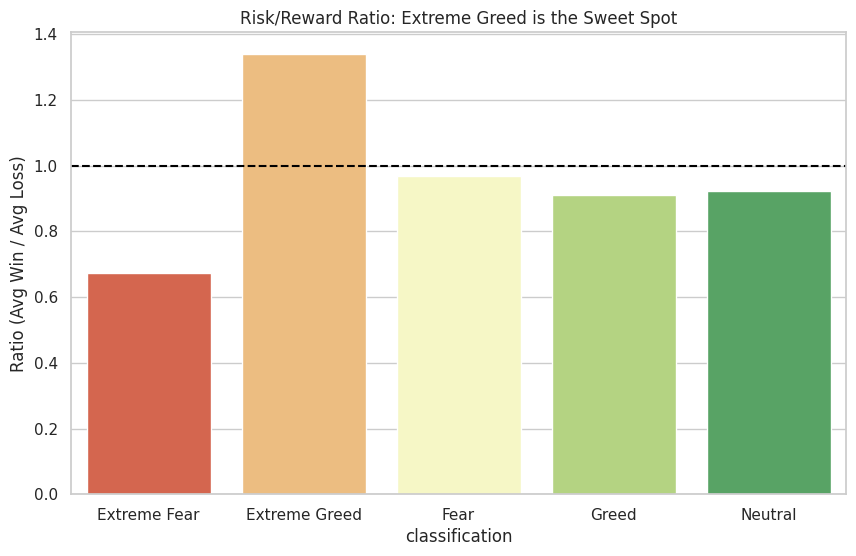

In [17]:
sns.set(style="whitegrid")

# Chart 1: Risk/Reward Ratio
plt.figure(figsize=(10, 6))
sns.barplot(x=deep_dive.index, y='Risk/Reward', data=deep_dive, palette='RdYlGn')
plt.axhline(1, color='black', linestyle='--')
plt.title('Risk/Reward Ratio: Extreme Greed is the Sweet Spot')
plt.ylabel('Ratio (Avg Win / Avg Loss)')
plt.savefig('risk_reward_deep_dive.png')

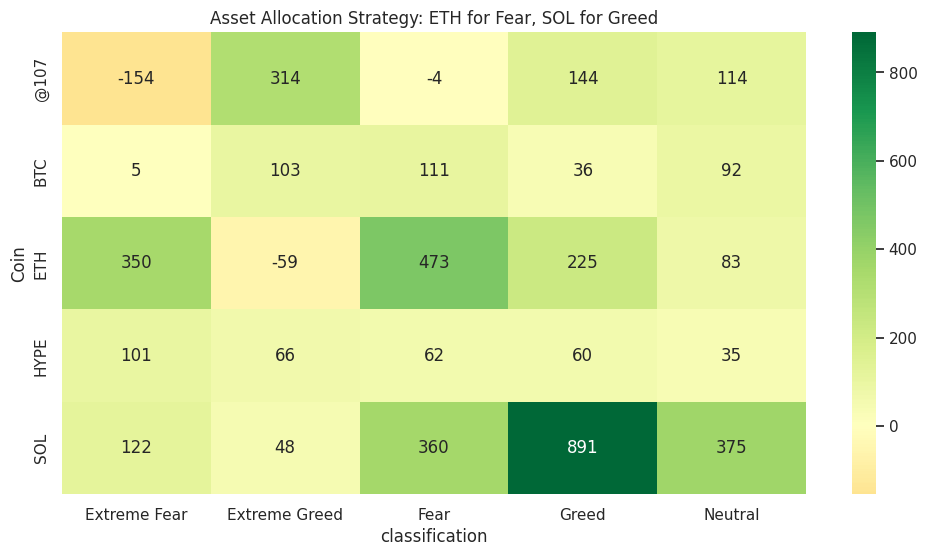

In [18]:
# Chart 2: Coin Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(coin_pnl, annot=True, fmt=".0f", cmap="RdYlGn", center=0)
plt.title('Asset Allocation Strategy: ETH for Fear, SOL for Greed')
plt.savefig('coin_strategy_heatmap.png')

/tmp/ipython-input-139607561.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rekt_prob.index, y=rekt_prob.values, palette='Reds')


Deep dive analysis complete. Charts saved.


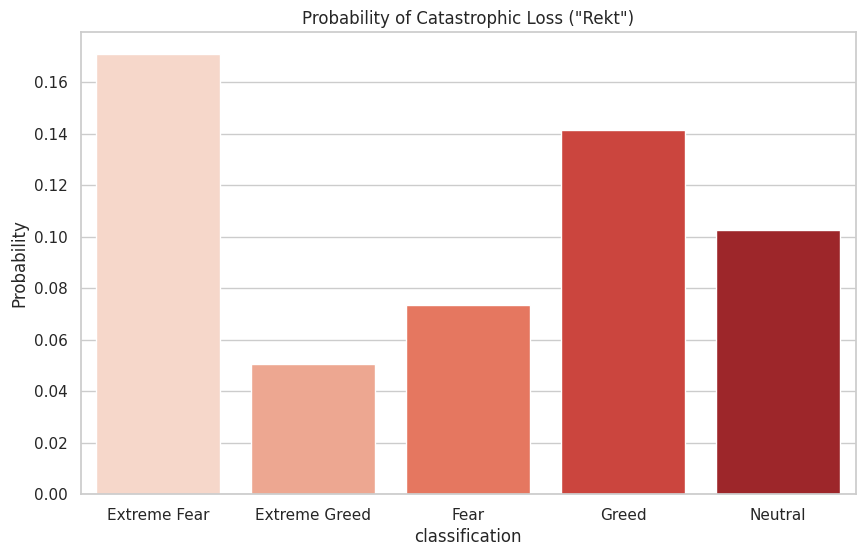

In [19]:
# Chart 3: "Rekt" Probability (Outliers)
# Define Rekt as Bottom 10% PnL
rekt_threshold = closed_trades['Closed PnL'].quantile(0.10)
closed_trades['is_rekt'] = closed_trades['Closed PnL'] <= rekt_threshold
rekt_prob = closed_trades.groupby('classification')['is_rekt'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=rekt_prob.index, y=rekt_prob.values, palette='Reds')
plt.title('Probability of Catastrophic Loss ("Rekt")')
plt.ylabel('Probability')
plt.savefig('rekt_probability.png')

print("Deep dive analysis complete. Charts saved.")